# PréProcessing NLP 

### Import des Librairies

In [32]:
import pandas as pd

from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import re
import itertools as it
import nltk as nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

### Travail à partir d'un échantillon de données pris manuellement

Création d'une dataframe avec les données

In [2]:
import pandas as pd

df = pd.DataFrame({'commentaires': ["Hôtel moderne et chic, très bien situé entre commerces, transports et points d'intérêts (visites). Chambre spacieuse, calme et bien équipée.", "hôtel idéalement situé à 2 pas de la gare st lazard et d'une bouche de métro; quartier animé.Accueil 24h/24 personnel très agréable. Service bagage. Chambre donnant sur rue mais parfaitement insonorisée.", "Hôtel rénové, très propre, accueil agréable, petit déjeuner très bien avec une serveuse très souriante et aux petits soins avec les clients.Juste au pied de la gare Saint-Lazare, très pratique.Petit bémol, deux lits simples collés à la place d'un lit double, pas pratique pour un weekend amoureux!Sinon très bien, une adresse à retenir.", "accueil excecrable,le prix d un trois étoiles, le servie du hotel une étoile à bannir .", "Logé dans cet hôtel pour une nuit, HEUREUSEMENT !!! Réservation faite sur internet pour trois personnes, arrivé a l'hôtel un dimanche après midi vers 14h30 la dame a l'accueille pas souriante du tous avec un aire très sec nous demande nos carte identité et me fait signé un papier sans expliqué as quoi sa consiste. Avec les sourire je la demande ce quoi ce papier et la elle me répond avec un ton très hautin Ne vous inquiet pas on n a pas l habitude de faire signé n importe quoi aux gens MERCI MADAME néanmoins je voudrai bien savoir ce que je signe dans la limite du possible.", "Arriver dans notre chambre, chambre très petite pour trois personne avec un lit coller a la porte fenêtrer qui bloque l'accès au balcon, le code wifi fourni ne marche pas, obligé de redescendre 5 étages pour revenir a l'accueille pour trouver une solution, la télé impossible de regarder sans une code d'accès, appelle la réception qui nous envoie une personne pour résoudre les problème ( personne très agréable et très gentil MERCI a lui).", "En brefs plus jamais je remettrai les pieds. CHER MADAME de, la réception qui étais la ce dimanche, on ne pas coupable si votre métiers ne vous plait pas, être MAL AIMABLE avec les gens sa ne rapporte rien de bon sauf de perdre vos clients.", "Hôtel rénové, très propre, accueil agréable, petit déjeuner très bien avec une serveuse très souriante et aux petits soins avec les clients. Juste au pied de la gare Saint-Lazare, très pratique.Petit bémol, deux lits simples collés à la place d'un lit double, pas pratique pour un weekend amoureux!Sinon très bien, une adresse à retenir", "la chambre exécutive était très spacieuse, un peu fraîche,( mais je préfère cela à une chambre surchauffée) surtout la salle de bains sans chauffage propre, la literie excellente, très calme à l 'arrière de l hôtelle petit déjeuner excellent avec des produits de qualitépersonnel très agréable et à l 'écoute", "Petit hôtel bien situé pour visiter Paris à pieds , la chambre est petite , mais moderne , très bien décorée bonne literie , la salle de bain est grande avec douche à l italienne .Très bien insonorisé. J ai apprécié la collation offerte à notre arrivée , et les petits déjeuners sont corrects" ], 'évaluation': ["bon", "bon", "bon", "mauvais", "mauvais", "mauvais", "mauvais", "bon", "bon", "bon"]},
                      index = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', "a9", "a10"])

In [3]:
df

,commentaires,évaluation
a1,"Hôtel moderne et chic, très bien situé entre c...",bon
a2,hôtel idéalement situé à 2 pas de la gare st l...,bon
a3,"Hôtel rénové, très propre, accueil agréable, p...",bon
a4,"accueil excecrable,le prix d un trois étoiles,...",mauvais
a5,"Logé dans cet hôtel pour une nuit, HEUREUSEMEN...",mauvais
a6,"Arriver dans notre chambre, chambre très petit...",mauvais
a7,En brefs plus jamais je remettrai les pieds. C...,mauvais
a8,"Hôtel rénové, très propre, accueil agréable, p...",bon
a9,"la chambre exécutive était très spacieuse, un ...",bon
a10,Petit hôtel bien situé pour visiter Paris à pi...,bon


Préprocessing : nettoyer les données. 
Comme le travail se fait sur des commentaires il faut enlever tout ce qui ne serait pas utile pour déterminer l'avis d'un commentaire. Y compris dans un premier temps la ponctuation. 

In [4]:
def sup_ponctuations(commentaires):
    ponctuations = '''!()-[]{};:'"\,./?@#$%^&@*_~'''
    pas_de_ponc = ""
    for carac in commentaires:
        if carac not in ponctuations:
            pas_de_ponc = pas_de_ponc + carac
    return pas_de_ponc.lower()

In [5]:
com1 = "Accueil excecrable, le prix d un trois étoiles, le servie du hotel une étoile! A bannir."

In [6]:
sup_ponctuations(com1)

'accueil excecrable le prix d un trois étoiles le servie du hotel une étoile a bannir'

In [7]:
df["commentaires"] = df["commentaires"].apply(sup_ponctuations)

In [8]:
df

,commentaires,évaluation
a1,hôtel moderne et chic très bien situé entre co...,bon
a2,hôtel idéalement situé à 2 pas de la gare st l...,bon
a3,hôtel rénové très propre accueil agréable peti...,bon
a4,accueil excecrablele prix d un trois étoiles l...,mauvais
a5,logé dans cet hôtel pour une nuit heureusement...,mauvais
a6,arriver dans notre chambre chambre très petite...,mauvais
a7,en brefs plus jamais je remettrai les pieds ch...,mauvais
a8,hôtel rénové très propre accueil agréable peti...,bon
a9,la chambre exécutive était très spacieuse un p...,bon
a10,petit hôtel bien situé pour visiter paris à pi...,bon


Ensuite enlever tous les éléments essentiels à des phrases mais inutiles ici dans le cadre de la détection d'un bon ou d'un mauvais commentaire en utilisant la librairie nltk avec la fonction stopwords. 
Pour en savoir plus veuillez consultez la liste des mots que stopwords définit comme étant inutile dans le cadre d'un projet de nlp https://countwordsfree.com/stopwords/french.

In [9]:
def mots_inutiles(commentaires):
    mots = stopwords.words('french')
    comm_nettoyés = ""
    for mot in commentaires.split():
        if mot not in mots:
            comm_nettoyés = comm_nettoyés + ' ' + mot
    return comm_nettoyés

In [10]:
def com_preproc(commentaires):
    ponctuations = '''!()-[]{};:'"\,./?@#$%^&@*_~'''
    pas_de_ponc = ""
    for carac in commentaires:
        if carac not in ponctuations:
            pas_de_ponc = pas_de_ponc + carac
    mots = stopwords.words('french')
    comm_nettoyés = ""
    for mot in pas_de_ponc.split():
        if mot not in mots:
            comm_nettoyés = comm_nettoyés + ' ' + mot
    return comm_nettoyés        

In [11]:
df["commentaires"] = df["commentaires"].apply(mots_inutiles)

In [12]:
df

,commentaires,évaluation
a1,hôtel moderne chic très bien situé entre comm...,bon
a2,hôtel idéalement situé 2 gare st lazard dune ...,bon
a3,hôtel rénové très propre accueil agréable pet...,bon
a4,accueil excecrablele prix trois étoiles servi...,mauvais
a5,logé cet hôtel nuit heureusement réservation ...,mauvais
a6,arriver chambre chambre très petite trois per...,mauvais
a7,brefs plus jamais remettrai pieds cher madame...,mauvais
a8,hôtel rénové très propre accueil agréable pet...,bon
a9,chambre exécutive très spacieuse peu fraîche ...,bon
a10,petit hôtel bien situé visiter paris pieds ch...,bon


Agrégation des fonctions en une seule. 

In [13]:
def com_preproc(commentaires):
    ponctuations = '''!()-[]{};:'"\,./?@#$%^&@*_~'''
    pas_de_ponc = ""
    for carac in commentaires:
        if carac not in ponctuations:
            pas_de_ponc = pas_de_ponc + carac
    mots = stopwords.words('french')
    comm_nettoyés = ""
    for mot in pas_de_ponc.split():
        if mot not in mots:
            comm_nettoyés = comm_nettoyés + ' ' + mot
    return comm_nettoyés 

In [14]:
df["commentaires"] = df["commentaires"].apply(com_preproc)

In [15]:
df

,commentaires,évaluation
a1,hôtel moderne chic très bien situé entre comm...,bon
a2,hôtel idéalement situé 2 gare st lazard dune ...,bon
a3,hôtel rénové très propre accueil agréable pet...,bon
a4,accueil excecrablele prix trois étoiles servi...,mauvais
a5,logé cet hôtel nuit heureusement réservation ...,mauvais
a6,arriver chambre chambre très petite trois per...,mauvais
a7,brefs plus jamais remettrai pieds cher madame...,mauvais
a8,hôtel rénové très propre accueil agréable pet...,bon
a9,chambre exécutive très spacieuse peu fraîche ...,bon
a10,petit hôtel bien situé visiter paris pieds ch...,bon


In [50]:
nombre_évaluation = df["évaluation"].value_counts()
nombre_évaluation

bon        6
mauvais    4
Name: évaluation, dtype: int64

Une fois qu'on a éliminé le superflu dans les commentaires il faut réussir à transformer tout cela en valeur numériques afin de pouvoir faire des prédictions. Pour cela sklearn met à disposition la librairie extraction_text et la fonction associée countvectorizer qui va assigner à chaque mot en les découpant dans toutes les phrases un numéro. http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/artificiel_tokenize_features.html

In [16]:
messages_bow = CountVectorizer(analyzer=com_preproc).fit_transform(df['commentaires'])

In [19]:
messages_bow.todense()

matrix([[17,  0,  0,  0,  0,  0,  0,  4,  3,  7,  2, 15,  0,  0,  3, 10,
          0,  0,  2,  5,  7,  4,  4,  1,  8, 11, 10,  3,  1,  0,  0,  0,
          1,  4,  1,  0,  1],
        [23,  0,  0,  3,  0,  2,  0, 15,  4,  5,  4, 19,  1,  4,  4,  9,
          0,  0,  6,  5, 11,  6,  2,  1, 13,  7, 10,  6,  1,  0,  0,  1,
          1,  6,  0,  0,  1],
        [37,  0,  0,  0,  0,  0,  0, 13,  5,  5,  7, 34,  0,  2,  1, 18,
          2,  1, 13,  3, 13,  9, 10,  2, 20, 21, 21, 12,  2,  1,  2,  1,
          5,  6,  0,  0,  1],
        [ 9,  0,  0,  0,  0,  0,  0,  3,  2,  4,  0, 10,  0,  0,  1,  7,
          0,  0,  6,  0,  2,  4,  1,  0,  5,  3,  4,  1,  1,  0,  2,  0,
          0,  2,  0,  0,  0],
        [60,  1,  1,  0,  1,  1,  0, 27,  3,  8, 12, 43,  3,  5,  7, 40,
          0,  0, 10, 12, 25, 17, 10,  5, 25, 25, 24, 15,  5,  0,  1,  0,
          3,  9,  0,  0,  2],
        [47,  0,  0,  0,  0,  0,  1, 17,  8, 16,  7, 42,  3,  5,  3, 17,
          0,  0, 18,  6, 16, 20, 10,  1, 33, 17

Analyser l'occurence des mots dans les commentaires là on a pris l'ensemble des commentaires indépendamment qu'ils soient bons ou mauvais. A la suite de cette première analyse et afin de voir quelles sont les différences nous ferons ce même graphiques mais avec un mask concernant les commentaires.

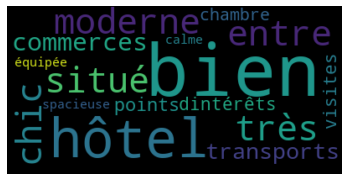

In [33]:
text = df.commentaires[0]

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

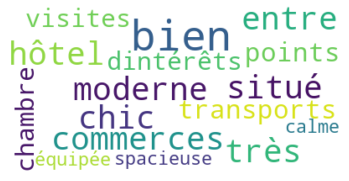

In [34]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [35]:
text = " ".join(commentaires for commentaires in df.commentaires)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 2236 words in the combination of all review.


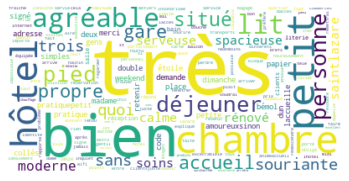

In [37]:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [46]:
df_bon_com = df["évaluation"].str.contains("bon")

In [47]:
df_bon_com

a1      True
a2      True
a3      True
a4     False
a5     False
a6     False
a7     False
a8      True
a9      True
a10     True
Name: évaluation, dtype: bool

In [53]:
comms_bons = df.loc[(df['évaluation'] == "bon")]
comms_bons

,commentaires,évaluation
a1,hôtel moderne chic très bien situé entre comm...,bon
a2,hôtel idéalement situé 2 gare st lazard dune ...,bon
a3,hôtel rénové très propre accueil agréable pet...,bon
a8,hôtel rénové très propre accueil agréable pet...,bon
a9,chambre exécutive très spacieuse peu fraîche ...,bon
a10,petit hôtel bien situé visiter paris pieds ch...,bon


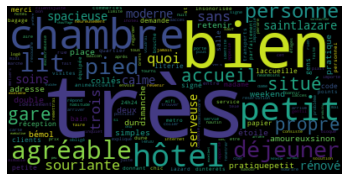

In [54]:
text_bons = comms_bons.commentaires[0]

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
comms_mauvais = df.loc[(df['évaluation'] == "mauvais")]
comms_mauvais


,commentaires,évaluation
a4,accueil excecrablele prix trois étoiles servi...,mauvais
a5,logé cet hôtel nuit heureusement réservation ...,mauvais
a6,arriver chambre chambre très petite trois per...,mauvais
a7,brefs plus jamais remettrai pieds cher madame...,mauvais


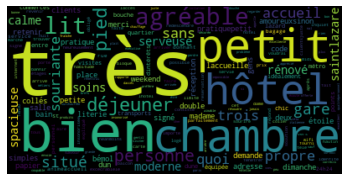

In [56]:
text_mauvais = comms_mauvais.commentaires[0]

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ainsi nous pouvons que les mots récurrents change en fonctions de si le commentaire a mis une bonne évaluation ou pas c'est pourquoi l'étape de la prédiction consiste tout simplement à définir si le commentaire est positive ou négative en fonction de l'occurence d'un mot. 

## Naives Bayes. 

Ici on a choisi de prendre l'algo de classification de Naives bayes pour deux raisons la première c'est que cet algo est utilisé pour de la classification or nous cherchons à déterminer les bons et mauvais commentaires. Deuxièmement il s'agit ici de données scrappés d'un certain nombre or il conviendrait que ce soit cet algo qui soit le plus à même de faire des meilleures prédictions dans de telles configuration.
https://www.google.com/search?q=choix+algo+sklearn&client=firefox-b-d&sxsrf=ALeKk01NkMgu1_ohsWZs4auhwHXqgbXNSg:1590656994605&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiVsf2Im9bpAhUNJhoKHWPACk8Q_AUoAXoECAwQAw&biw=1920&bih=966#imgrc=BxrGpsOIhhOFJM

Splittage des données en test et train avec identification des variables et de la target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['évaluation'], test_size = 0.20, random_state = 0)

In [23]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
#Print the predictions
print(classifier.predict(X_train))#Print the actual values
print(y_train.values)

['mauvais' 'bon' 'bon' 'mauvais' 'bon' 'mauvais' 'bon' 'mauvais']
['mauvais' 'bon' 'bon' 'mauvais' 'bon' 'mauvais' 'bon' 'mauvais']


In [44]:
#Print the predictions
print('valeurs prédites: ',classifier.predict(X_test))#Print Actual Label
print('réelles valeurs: ',y_test.values)

valeurs prédites:  ['bon' 'mauvais']
réelles valeurs:  ['bon' 'bon']


In [45]:
accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test ,pred ))
print('--------------------------------------')
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))
print('-------------------------------------')
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

         bon       1.00      0.50      0.67         2
     mauvais       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2

--------------------------------------
Confusion Matrix: 
 [[1 1]
 [0 0]]
-------------------------------------
Accuracy:  0.5
